<a href="https://colab.research.google.com/github/teteumac/ML_Alabama/blob/main/Hackathon_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/UAPH4582/PH482_582_Sp22/blob/main/Hackathons/Hackathon-01.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

**This is an example Notebook for running training on Higgs vs background signal classification. **

**Background:** High-energy collisions at the Large Hadron Collider (LHC) produce particles that interact with particle detectors. One important task is to classify different types of collisions based on their physics content, allowing physicists to find patterns in the data and to potentially unravel new discoveries. 

**Problem statement:** The discovery of the Higgs boson by CMS and ATLAS Collaborations was announced at CERN in 2012. In this challenge, we focus on the potential of Machine Learning in detecting potential Higgs signal from one of the background processes that mimics it. 

**Dataset:** The dataset is made available by the Center for Machine Learning and Intelligent Systems at University of California, Irvine. 
The dataset can be found on the [UCI Machine learning Repository](https://archive.ics.uci.edu/ml/datasets/HIGGS)

**Description:** The dataset consists of a total of 11 million labeled samples of Higgs vs background events produced by Monte Carlo simulations. Each sample consists of 28 features. The first 21 features are kinematic properties measured at the level of the detectors. The last seven are functions of the first 21.




**Steps to load the training dataset**
1. Download the dataset from the UCI website. 

In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00280/HIGGS.csv.gz

--2022-02-16 01:08:10--  https://archive.ics.uci.edu/ml/machine-learning-databases/00280/HIGGS.csv.gz
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2816407858 (2.6G) [application/x-httpd-php]
Saving to: ‘HIGGS.csv.gz’

HIGGS.csv.gz        100%[===================>]   2.62G  48.8MB/s    in 56s     

2022-02-16 01:09:07 (47.7 MB/s) - ‘HIGGS.csv.gz’ saved [2816407858/2816407858]



2. Unzip the dataset folder

In [2]:
 !gzip -d HIGGS.csv.gz

gzip: HIGGS.csv already exists; do you wish to overwrite (y or n)? y
y
y


In [3]:
pip install plot-metric ## For plotting ROC at the end

In [4]:
from sklearn.datasets import make_gaussian_quantiles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [5]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [6]:
import numpy as np
np.random.seed(1337)  # for reproducibility
import h5py
from keras.models import Sequential
from keras.optimizers import adam_v2
from keras.initializers import TruncatedNormal
from keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ReduceLROnPlateau

from sklearn.metrics import roc_curve, auc

import matplotlib.pyplot as plt

**Load the file using pandas library**

In [7]:
data=pd.read_csv('./HIGGS.csv')

Assign first column 0 to class labels (labeled 1 for signal, 0 for background)  and all others to feature matrix X.

For demonstration, here we only use 1000 samples. To train on the entire dataset, uncomment the lines below. 

In [8]:
X=data.iloc[:200000,1:]#data.iloc[:,1:]
y=data.iloc[:200000,0]#data.iloc[:,0]

Split your data into training and validation samples, where the fraction of the data used for validation is 20%. 

In [9]:
X_train1, X_test, y_train1, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size=0.2, random_state=42)

**Visualize your data - One histogram per feature column**

Detailed information on what each feature column is can be found in *Attribute Information* section on the [UCI Machine learning Repositery](https://archive.ics.uci.edu/ml/datasets/HIGGS). For further information, refer to the [paper](https://www.nature.com/articles/ncomms5308) by Baldi et. al 

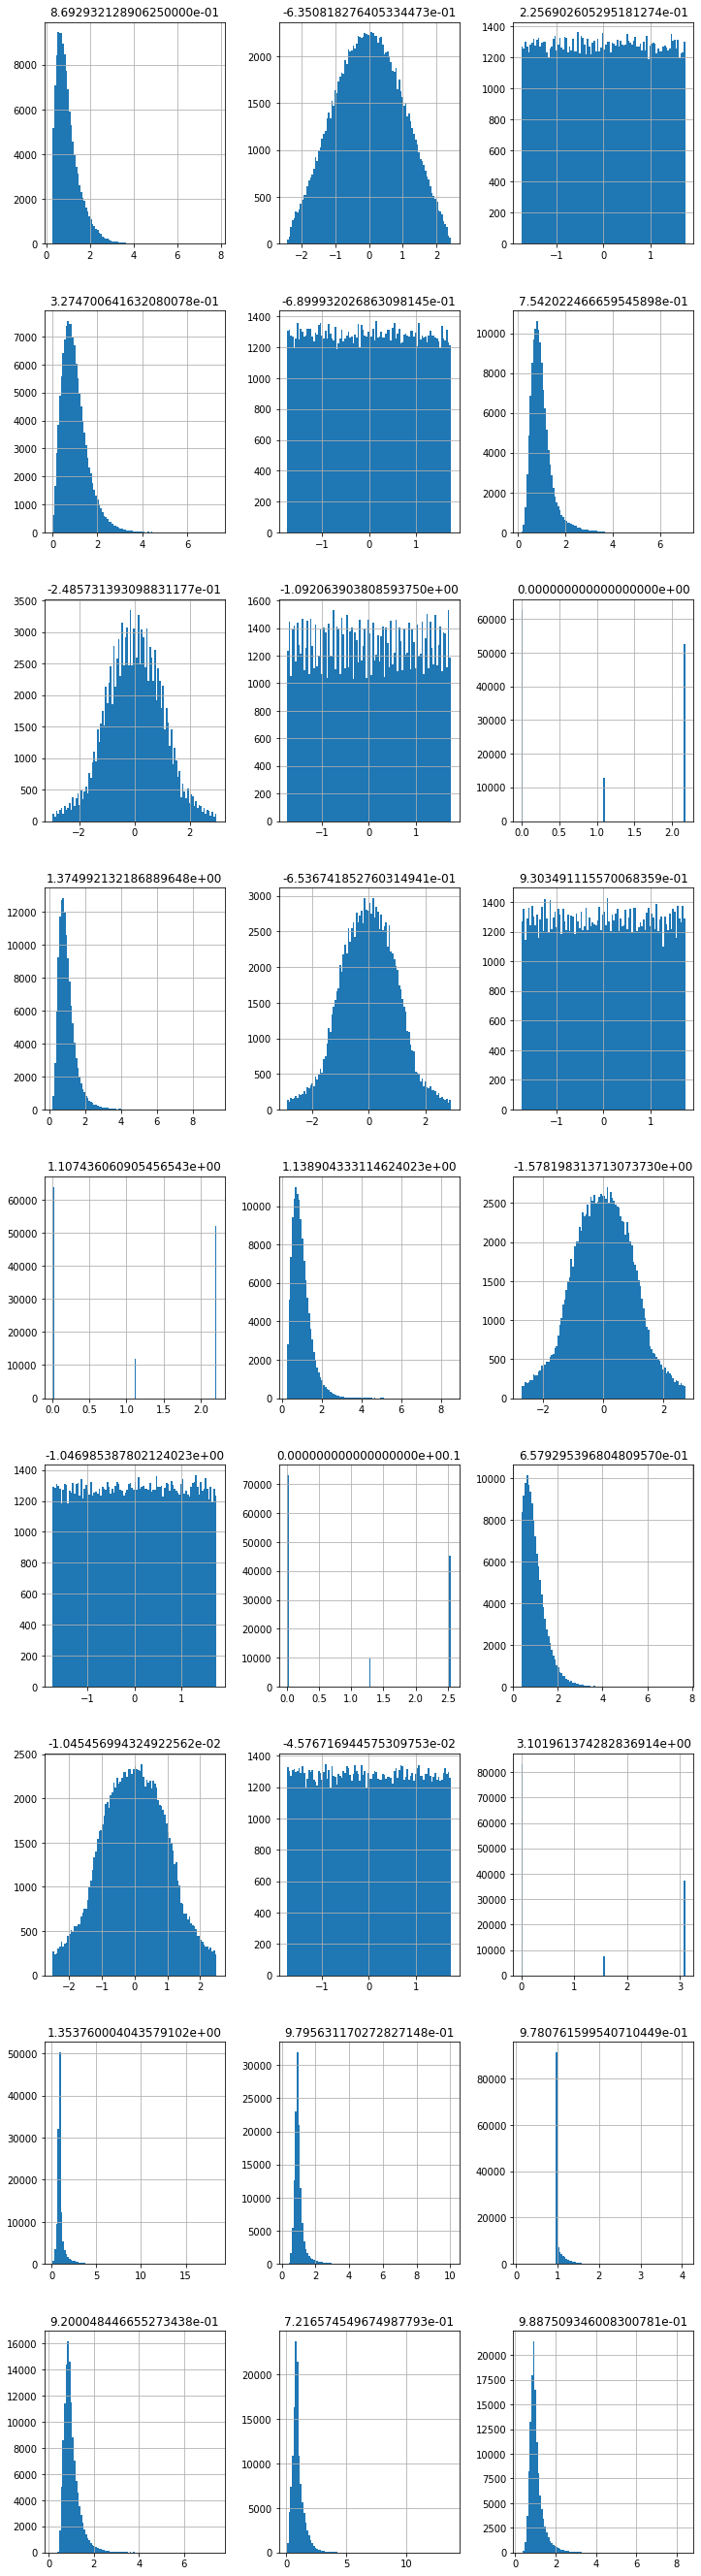

In [10]:
from itertools import combinations
import matplotlib.pyplot as plt

fig, axes = plt.subplots(len(X_train.columns)//3, 3, figsize=(12, 48))

i = 0
for triaxis in axes:
    for axis in triaxis:
        X_train.hist(column = X_train.columns[i], bins = 100, ax=axis)
        i = i+1

# Boosted Decision Tree model

**Setup the Boosted Decision Tree model** 


In [11]:
classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
)

**Train the Boosted Decision Tree model**

In [12]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [13]:
classifier.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=200)

**Predict on new testing data**

In [14]:
predictions = classifier.predict(X_test)

In [15]:
y_hat = classifier.predict_proba(X_test)[:, 1]

Print confusion matrix and plot ROC curve.

In [16]:
confusion_matrix(y_test, predictions)

array([[12296,  6447],
       [ 5762, 15495]])

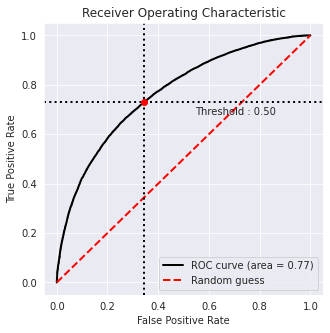

In [17]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_hat, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

# Shallow Neural Networks (optional for those who are familiar with NNs)

**Setup the Neural Network** (some useful info [here](https://towardsdatascience.com/a-gentle-introduction-to-neural-networks-series-part-1-2b90b87795bc))

In [18]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

In [19]:
model_nn = Sequential()
model_nn.add(Dense(28, input_dim=28, activation='relu'))
model_nn.add(Dense(8, activation='relu'))
model_nn.add(Dense(1, activation='sigmoid'))

**Train the Neural Network and save your model weights in a h5 file**

(Train for more epochs than shown here and play around with the architecture) 

In [20]:
# compile the keras model
model_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
history=model_nn.fit(X, y,validation_data=(X_val,y_val),epochs=5, batch_size=10)
# evaluate the keras model
_, accuracy = model_nn.evaluate(X, y)
model_nn.save('my_model.h5') ##Saving model weights
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/5
20000/20000 [==============================] - 94s 5ms/step - loss: 0.6346 - accuracy: 0.6327 - val_loss: 0.6049 - val_accuracy: 0.6678
Epoch 2/5
20000/20000 [==============================] - 89s 4ms/step - loss: 0.6042 - accuracy: 0.6707 - val_loss: 0.5942 - val_accuracy: 0.6837
Epoch 3/5
20000/20000 [==============================] - 79s 4ms/step - loss: 0.5952 - accuracy: 0.6786 - val_loss: 0.5863 - val_accuracy: 0.6882
Epoch 4/5
20000/20000 [==============================] - 75s 4ms/step - loss: 0.5889 - accuracy: 0.6850 - val_loss: 0.5815 - val_accuracy: 0.6889
Epoch 5/5
6250/6250 [==============================] - 21s 3ms/step - loss: 0.5770 - accuracy: 0.6959
Accuracy: 69.59


In [21]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


**Plot accuracy wrt number of epochs**

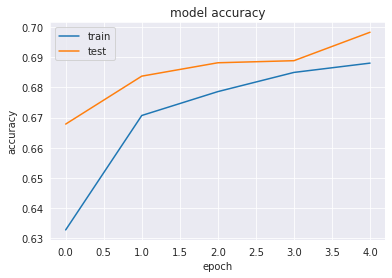

In [22]:

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


**Plot training loss wrt number of epochs**

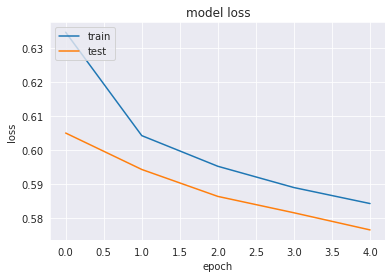

In [23]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [24]:
y_pred=model_nn.predict(X_test)

In [25]:
confusion_matrix(y_test, y_pred.round())

array([[11994,  6749],
       [ 5399, 15858]])

**Plot the ROC (Receiver Operating Characteristic) Curve** (more info on ROC could be found [here](https://en.wikipedia.org/wiki/Receiver_operating_characteristic))

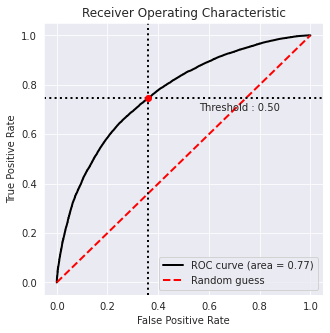

In [26]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

**Goal:** Please train your own machine learning model (or modify provided examples) with the goal of attaining the top classifier performance.

In [27]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [28]:
model =  LGBMClassifier(  )
model_result = model.fit( X_train, y_train )               

In [29]:
predictions = classifier.predict(X_test)

In [30]:
y_predict_proba = model_result.predict_proba(X_test)

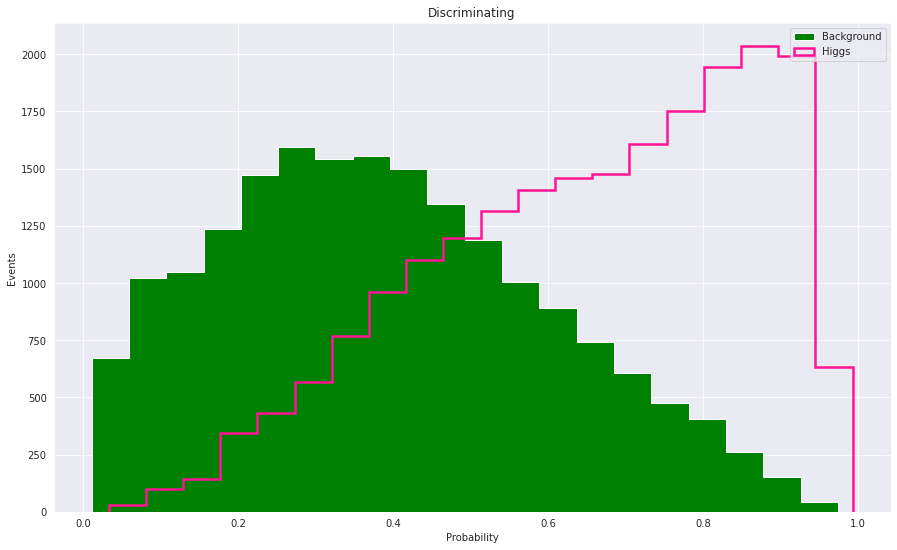

In [31]:
plt.figure(figsize=(15,9))
plt.hist(y_predict_proba[:,1][y_test == 0], color = 'green', histtype='stepfilled', bins = 20, label = 'Background' )
plt.hist(y_predict_proba[:,1][y_test == 1], color = 'deeppink', linewidth=2.5,  histtype = 'step', bins = 20, label = 'Higgs' )
plt.xlabel('Probability')
plt.ylabel('Events')
plt.title('Discriminating')
#plt.yscale('log')
plt.legend(loc = 'best')

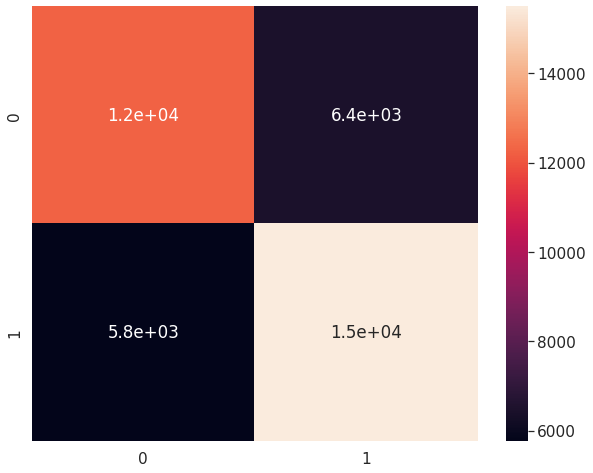

In [32]:
import seaborn as sns
plt.figure(figsize=(10,8))
confi_matrix = confusion_matrix(y_test, predictions)
sns.set( font_scale = 1.4 )
sns.heatmap( confi_matrix, annot = True )

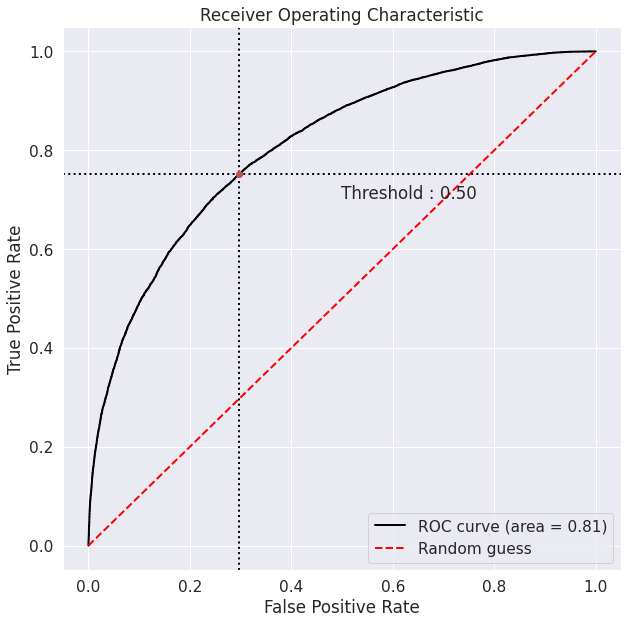

In [35]:
bc = BinaryClassification(y_test, y_predict_proba[:,1], labels=["Class 1", "Class 2"])
# Figures
plt.figure(figsize=(10,10))
bc.plot_roc_curve()
plt.show()

**Deliverables:**

Please submit the following:

- Your full notebook (pdf and `.ipynb`) used for training including the ROC Curves, loss and accuracy plots wrt number of epochs.
- for Neural Networks: model weights (`.h5`)

**References:**

Baldi, P., Sadowski P., and Whiteson D. “Searching for Exotic Particles in High-energy Physics with Deep Learning.” Nature Communications 5 (July 2, 2014).